In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv("Downloads/mnist_train.csv", header=None)
mnist_test = pd.read_csv("Downloads/mnist_test.csv", header=None)

In [3]:
mnist_train.shape

(60000, 785)

In [4]:
mnist_test.shape

(10000, 785)

In [5]:
mnist_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = ["label"]
for i in range(784):
    cols.append("px_{}".format(i + 1))

In [7]:
mnist_train.columns = cols
mnist_test.columns = cols

In [8]:
mnist_train.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
image_row = mnist_train.values[313, 1:]

In [10]:
image_row.shape

(784,)

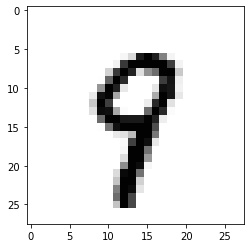

In [11]:
plt.imshow(image_row.reshape(28, 28), cmap="Greys")

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
train_data = mnist_train.values[:, 1:]
test_data = mnist_test.values[:, 1:]

In [14]:
train_label = mnist_train.values[:,0]
test_label = mnist_test.values[:,0]

In [15]:
print(train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [16]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


In [17]:
kn_classifier = KNeighborsClassifier(n_jobs=-1)

In [18]:
kn_classifier = kn_classifier.fit(train_data, train_label)

In [19]:
test_data.shape

(10000, 784)

На рисунке цифра 9


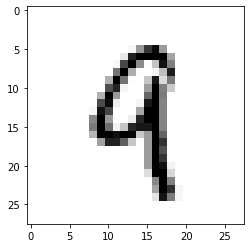

In [20]:
test_id = 530

plt.imshow(test_data[test_id, :].reshape(28,28), cmap="Greys")
print("На рисунке цифра {}".format(test_label[test_id]))

In [21]:
test_data.shape

(10000, 784)

In [22]:
test_data[test_id, :].shape

(784,)

In [23]:
kn_classifier.predict(test_data[test_id, :].reshape(1,784))

array([9], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
kn_predictions = kn_classifier.predict(test_data)

In [26]:
print("Accuracy: {}%".format(accuracy_score(test_label, kn_predictions) * 100))

Accuracy: 96.88%


In [27]:
accuracy_score(test_label, kn_predictions) * 10000

9688.0

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlp_classifier = MLPClassifier(verbose=True)

In [30]:
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 3.27941100
Iteration 2, loss = 0.90094607
Iteration 3, loss = 0.48270972
Iteration 4, loss = 0.32956896
Iteration 5, loss = 0.24188268
Iteration 6, loss = 0.19334975
Iteration 7, loss = 0.16019187
Iteration 8, loss = 0.14277989
Iteration 9, loss = 0.13515537
Iteration 10, loss = 0.12865166
Iteration 11, loss = 0.12375877
Iteration 12, loss = 0.11080872
Iteration 13, loss = 0.10885365
Iteration 14, loss = 0.10160714
Iteration 15, loss = 0.10216359
Iteration 16, loss = 0.09616900
Iteration 17, loss = 0.09220211
Iteration 18, loss = 0.09659932
Iteration 19, loss = 0.08822479
Iteration 20, loss = 0.08452150
Iteration 21, loss = 0.08824273
Iteration 22, loss = 0.07390955
Iteration 23, loss = 0.07181995
Iteration 24, loss = 0.07468476
Iteration 25, loss = 0.07482299
Iteration 26, loss = 0.06795903
Iteration 27, loss = 0.07049444
Iteration 28, loss = 0.06604886
Iteration 29, loss = 0.06733417
Iteration 30, loss = 0.06184326
Iteration 31, loss = 0.05906668
Iteration 32, los

На рисунке цифра 7


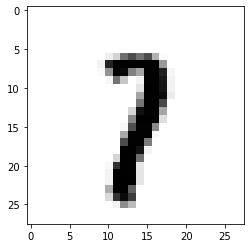

In [31]:
test_id = 111

plt.imshow(test_data[test_id, :].reshape(28,28), cmap="Greys")
print("На рисунке цифра {}".format(test_label[test_id]))

In [32]:
mlp_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([7], dtype=int64)

In [33]:
mlp_predictions = mlp_classifier.predict(test_data)

In [34]:
print("Accuracy: {}%".format(accuracy_score(test_label, mlp_predictions) * 100))

Accuracy: 96.69%
